In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn
import matplotlib.pyplot as plt
from scipy.special import gamma
import numpy as np
seaborn.set_context("talk", font_scale=1.5)
seaborn.set_style("whitegrid")
%matplotlib inline
det = np.linalg.det
inv = np.linalg.inv

In [2]:
def softmax(x):
    e = np.exp(x)
    return e / e.sum(axis=0)

In [16]:
def annealedsoftmax(x, t):
    e = np.exp( t* x)
    return e / e.sum(axis=0)

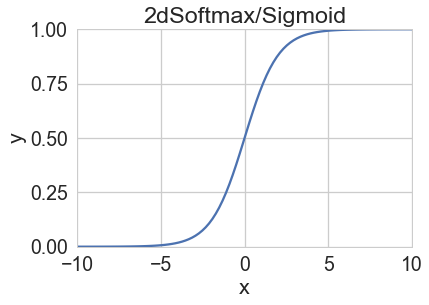

In [17]:
%matplotlib inline
def plot(x=0, y=0):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    plt.plot(x, softmax([x, y*0])[0])
    plt.title("2dSoftmax/Sigmoid")
    plt.xlim([-10, 10])
    plt.ylim([0-1e-5, 1.0+1e-5])
    plt.xlabel("x")
    plt.ylabel("y")
plot()

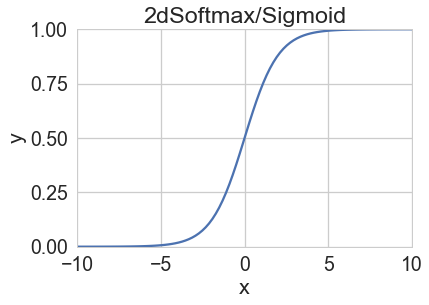

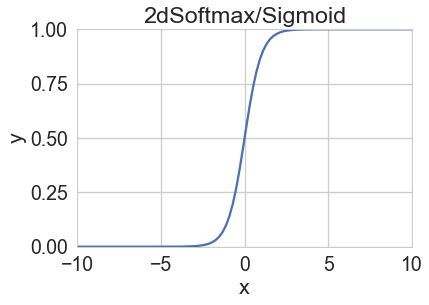

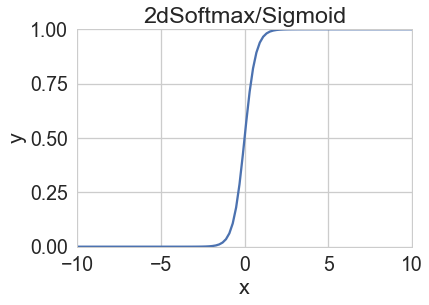

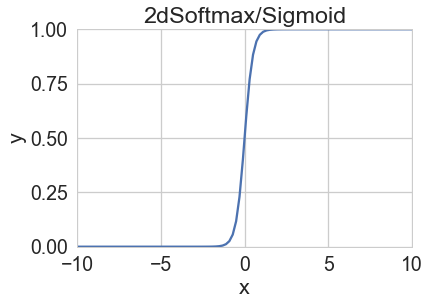

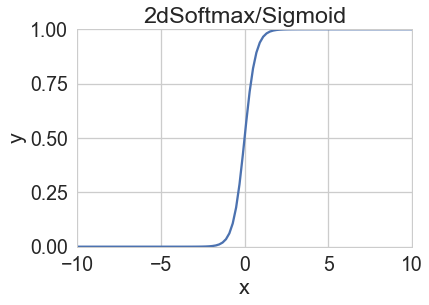

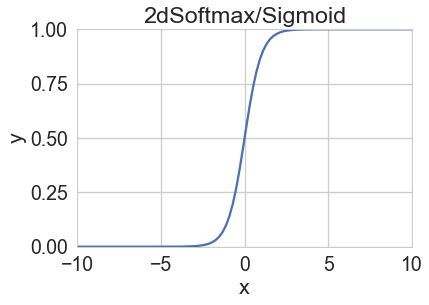

In [30]:
%matplotlib inline
def plot(x=0, y=0, temp=1):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    plt.plot(x, annealedsoftmax(np.array([x, y*0]), temp )[0])
    plt.title("2dSoftmax/Sigmoid")
    plt.xlim([-10, 10])
    plt.ylim([0-1e-5, 1.0+1e-5])
    plt.xlabel("x")
    plt.ylabel("y")
interactive(plot, temp=(0,10))

<IPython.core.display.Javascript object>


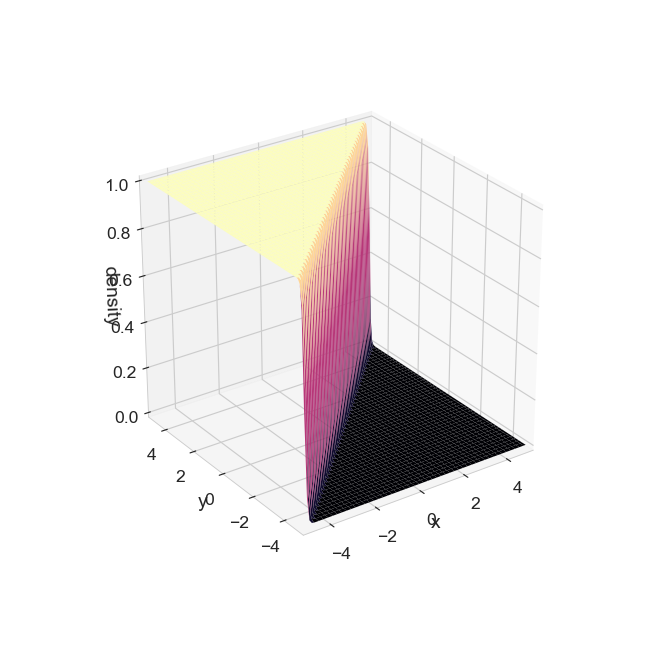

In [52]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

def plot(temp=0):
    ax.clear()
    x_o = np.linspace(-5, 5, 100)
    y_o = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x_o, y_o)
    Z = annealedsoftmax(np.array([x, y]), temp)[1]
    Z = Z.reshape(x.shape)
    f = ax.plot_surface(x, y, Z, cmap="magma")
#     ax.set_title("Gaussian(%2.2f, %2.2f, %2.2f, %2.2f, y=%2.2f)"%(mean_x, mean_y, var_x, var_y, y_check))
# #     ax.plot(x[0], gaussian_pdf(np.linspace(-5, 5, 100).reshape(100,1), np.array([mean_x]), np.array([[var_x]])), 
# #             zs =0, zdir="y")
#     p_x = Z.mean(0) * (y_o[-1] - y_o[0])
#     p_y = Z.mean(1) * (x_o[-1] - x_o[0])
#     ax.plot(x[0], p_x,  zs=5, zdir='y')
#     ax.plot(y[:, 0], p_y,  zs=-5, zdir='x')

#     p_x_y = Z[:, y_spot] / p_y[y_spot]
#     ax.plot(x[0], p_x_y, zs=y_check, zdir='y')

    ax.set_zlim([0, 1.0])
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("density")

interactive(plot, temp=(0,20.0))
# interactive(plot, mean_x=(-5.0, 5.0), mean_y=(-5.0, 5.0), var_x=(0.0, 5.0), 
#             var_y=(0, 5.0), covar_xy=(-1., 1.0), y_check=(-5.0, 5.0))